In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import requests
import sys
WTK_URL = "https://h2oq9ul559.execute-api.us-west-2.amazonaws.com/dev"

from pywtk.wtk_api import get_nc_data_from_url


/Users/hsorense/anaconda2/envs/pywtk/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Load interesting sites

In [2]:
import csv
site_data = {}
with open('interesting_sites.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        site_data[row['site_id']] = row
all_site_ids = site_data.keys()

### Pull data for first site from both met and forecast

In [3]:
site_id = all_site_ids[0]
start = pandas.Timestamp('2013-01-01', tz='utc')
end = pandas.Timestamp('2013-01-07', tz='utc')
utc = True
attributes = ["power", "wind_direction", "wind_speed", "temperature", "pressure", "density"]
met_data = get_nc_data_from_url(WTK_URL+"/met", site_id, start, end, attributes, utc=utc)
attributes_hour = ["hour_ahead_power","hour_ahead_power_p90", "hour_ahead_power_p10"]
attributes_4_hour = ["4_hour_ahead_power","4_hour_ahead_power_p90", "4_hour_ahead_power_p10"]
attributes_6_hour = ["6_hour_ahead_power","6_hour_ahead_power_p90", "6_hour_ahead_power_p10"]
attributes_day = ["day_ahead_power","day_ahead_power_p90", "day_ahead_power_p10"]
fcst_attributes = attributes_hour + attributes_4_hour + attributes_6_hour + attributes_day
fcst_data = get_nc_data_from_url(WTK_URL+"/fcst", site_id, start, end, fcst_attributes, utc=utc)


In [4]:
met_data.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-01 00:05:00+00:00',
               '2013-01-01 00:10:00+00:00', '2013-01-01 00:15:00+00:00',
               '2013-01-01 00:20:00+00:00', '2013-01-01 00:25:00+00:00',
               '2013-01-01 00:30:00+00:00', '2013-01-01 00:35:00+00:00',
               '2013-01-01 00:40:00+00:00', '2013-01-01 00:45:00+00:00',
               ...
               '2013-01-06 23:15:00+00:00', '2013-01-06 23:20:00+00:00',
               '2013-01-06 23:25:00+00:00', '2013-01-06 23:30:00+00:00',
               '2013-01-06 23:35:00+00:00', '2013-01-06 23:40:00+00:00',
               '2013-01-06 23:45:00+00:00', '2013-01-06 23:50:00+00:00',
               '2013-01-06 23:55:00+00:00', '2013-01-07 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name=u'datetime', length=1729, freq=None)

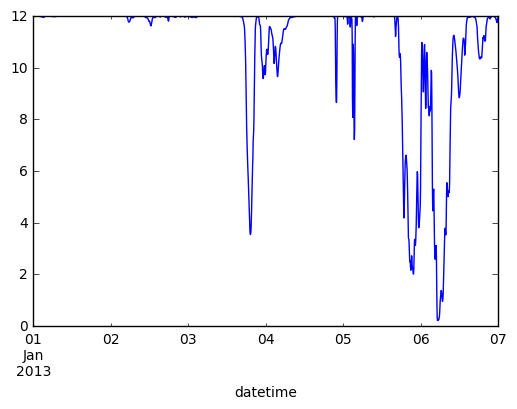

In [5]:
met_data['power'].plot()

In [6]:
met_data.head()

,power,wind_direction,wind_speed,temperature,pressure,density
datetime,,,,,,
2013-01-01 00:00:00+00:00,12.0,261.493591,15.595691,269.663483,94172.281250,1.202499
2013-01-01 00:05:00+00:00,12.0,261.411224,15.470577,269.694000,94175.023438,1.202423
2013-01-01 00:10:00+00:00,12.0,261.229919,15.372921,269.724518,94173.195312,1.202224
2013-01-01 00:15:00+00:00,12.0,261.191406,15.302741,269.764191,94170.445312,1.201983
2013-01-01 00:20:00+00:00,12.0,261.438446,15.232550,269.819122,94167.703125,1.201702


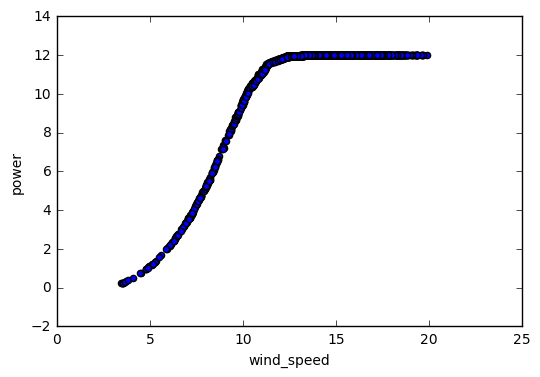

In [7]:
met_data.plot(kind='scatter', x='wind_speed', y='power')

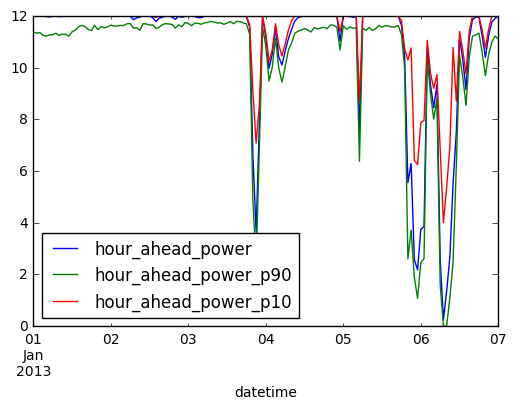

In [8]:
fcst_data[attributes_hour].plot()

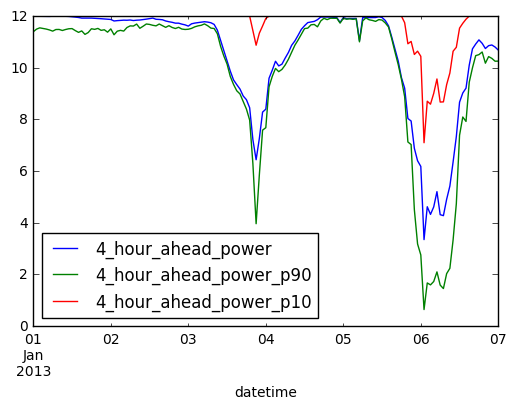

In [9]:
fcst_data[attributes_4_hour].plot()

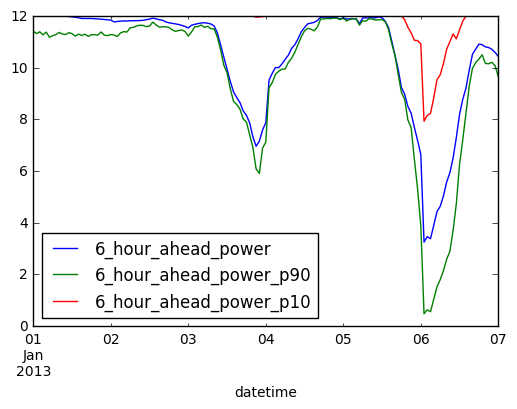

In [10]:
fcst_data[attributes_6_hour].plot()

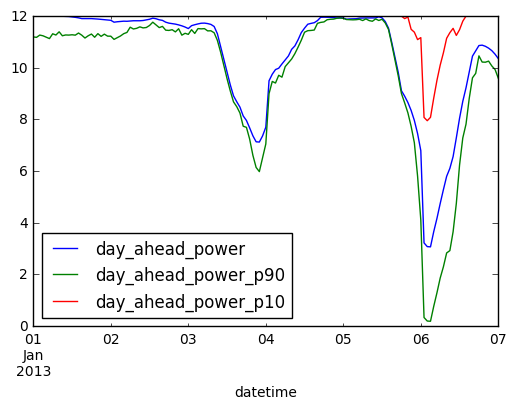

In [11]:
fcst_data[attributes_day].plot()

### Resample forecast data

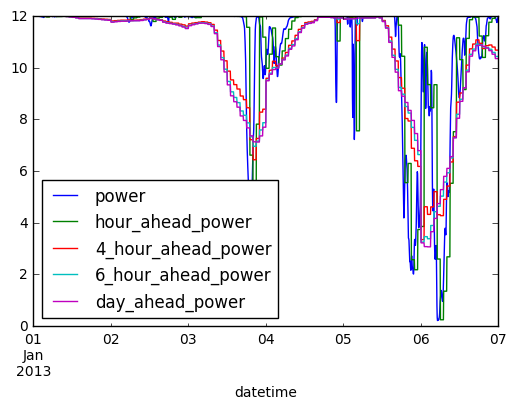

In [12]:
resampled_df = fcst_data[['hour_ahead_power','4_hour_ahead_power','6_hour_ahead_power','day_ahead_power']].resample('5min').mean().bfill()
total_df = pandas.concat([met_data['power'], resampled_df], axis=1)
total_df.plot()